In [64]:
df = pd.read_csv('data/Region_Mobility_Report_CSVs/2020_IT_Region_Mobility_Report.csv')
df = df[df['sub_region_1'] == 'Lombardy']
df = df.drop(columns=['country_region_code', 'country_region', 'sub_region_2', 'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id'])
df['date'] = pd.to_datetime(df['date'])
df = df.reset_index()
xdata = df['date'].dt.date
df = df.drop(columns=['index', 'sub_region_1'])

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-15,2.0,-1.0,50.0,8.0,-2.0,-1.0
1,2020-02-16,-1.0,2.0,13.0,2.0,0.0,-1.0
2,2020-02-17,-3.0,-2.0,-14.0,1.0,0.0,0.0
3,2020-02-18,2.0,1.0,32.0,4.0,1.0,0.0
4,2020-02-19,2.0,1.0,19.0,4.0,1.0,-1.0


In [46]:
freq = '5D'
rt = df.groupby(pd.Grouper(key='date', axis=0, freq=freq))['retail_and_recreation_percent_change_from_baseline'].mean()
gr = df.groupby(pd.Grouper(key='date', axis=0, freq=freq))['grocery_and_pharmacy_percent_change_from_baseline'].mean()
pa = df.groupby(pd.Grouper(key='date', axis=0, freq=freq))['parks_percent_change_from_baseline'].mean()
tr = df.groupby(pd.Grouper(key='date', axis=0, freq=freq))['transit_stations_percent_change_from_baseline'].mean()
wk = df.groupby(pd.Grouper(key='date', axis=0, freq=freq))['workplaces_percent_change_from_baseline'].mean()
re = df.groupby(pd.Grouper(key='date', axis=0, freq=freq))['residential_percent_change_from_baseline'].mean()
x = rt.index

In [53]:
days = [xdata[21], xdata[87],xdata[118],xdata[179],xdata[225],xdata[242],xdata[258],xdata[290]]

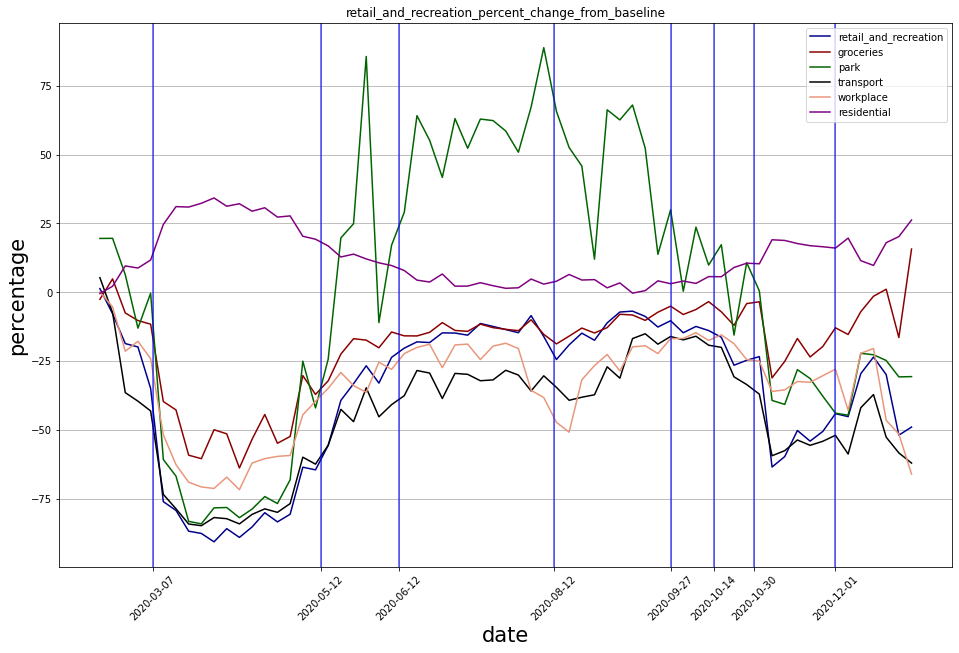

In [60]:
plt.figure(figsize=(16, 10))
plt.plot(x, rt, 'darkblue')
plt.plot(x, gr, 'darkred')
plt.plot(x, pa, 'darkgreen')
plt.plot(x, tr, 'k')
plt.plot(x, wk, 'darksalmon')
plt.plot(x, re, 'purple')

for d in days:
    plt.axvline(d, color = 'b',alpha = 0.7, label =str(d))

plt.legend(["retail_and_recreation", "groceries", "park", "transport", "workplace", "residential"],prop={"size":10})
plt.xlabel("date",size=21)
plt.ylabel("percentage",size=21)
plt.title("retail_and_recreation_percent_change_from_baseline")
plt.xticks(days, rotation = 45, fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid()
plt.show()

In [5]:
dy = np.diff(np.array(rt))/1

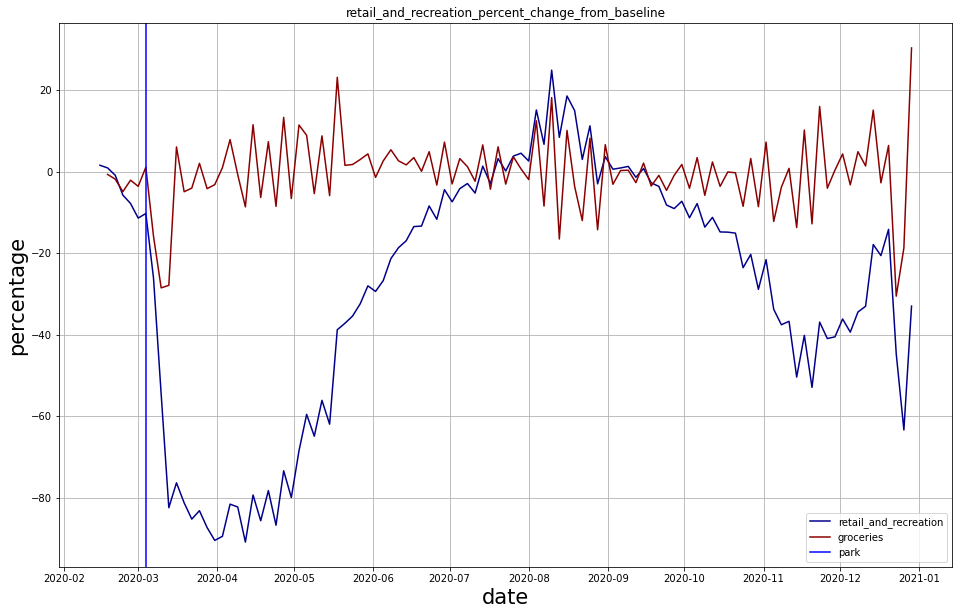

In [6]:
plt.figure(figsize=(16, 10))
plt.plot(x, rt, 'darkblue')
plt.plot(x[1:], dy, 'darkred')
plt.axvline(x = dt.datetime(2020, 3, 4), color = 'b', label = 'axvline - full height')

plt.legend(["retail_and_recreation", "groceries", "park", "transport", "workplace", "residential"],prop={"size":10})
plt.xlabel("date",size=21)
plt.ylabel("percentage",size=21)
plt.title("retail_and_recreation_percent_change_from_baseline")
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid()
plt.show()